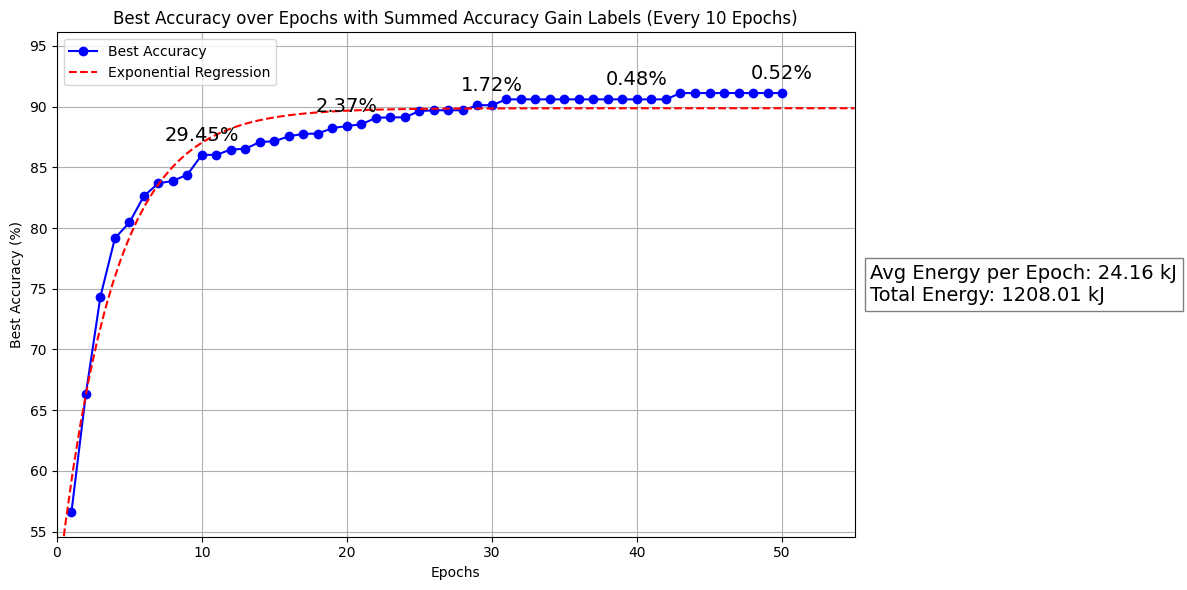

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def growth_exponential(x, L, k, y0):
    return L - (L - y0) * np.exp(-k * x)

file_path = "Cleaned_LTSNNData_WithAccuracyGained.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

avg_energy_kj = df['EpochEnergy_J'].mean() / 1000
total_energy_kj = df['EpochEnergy_J'].sum() / 1000

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['ep'], df['Best_Accuracy'], marker='o', linestyle='-', color='b', label='Best Accuracy')

x_data = df['ep']
y_data = df['Best_Accuracy']

initial_guesses = [df['Best_Accuracy'].max() + 10, 0.1, df['Best_Accuracy'].min() - 5]
popt, pcov = curve_fit(growth_exponential, x_data, y_data, p0=initial_guesses)

x_reg = np.linspace(0, df['ep'].max() + 5, 100)
y_reg = growth_exponential(x_reg, *popt)

ax.plot(x_reg, y_reg, linestyle='--', color='red', label='Exponential Regression')

summed_accuracy_gain = 0
for i, row in df.iterrows():
    summed_accuracy_gain += row['Accuracy_Gained']
    if (i + 1) % 10 == 0 or (i + 1) == len(df):
        ax.annotate(f"{summed_accuracy_gain:.2f}%", (row['ep'], row['Best_Accuracy']),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)
        summed_accuracy_gain = 0

ax.set_xlabel("Epochs")
ax.set_ylabel("Best Accuracy (%)")
ax.set_title("Best Accuracy over Epochs with Summed Accuracy Gain Labels (Every 10 Epochs)")
plt.text(1.02, 0.5, f"Avg Energy per Epoch: {avg_energy_kj:.2f} kJ\nTotal Energy: {total_energy_kj:.2f} kJ",
         transform=ax.transAxes, fontsize=14, verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0.5))

ax.set_ylim(df['Best_Accuracy'].min() - 2, df['Best_Accuracy'].max() + 5)

ax.set_xlim(0, df['ep'].max() + 5)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


###LT-SNN Adaptive Threshold Plotting

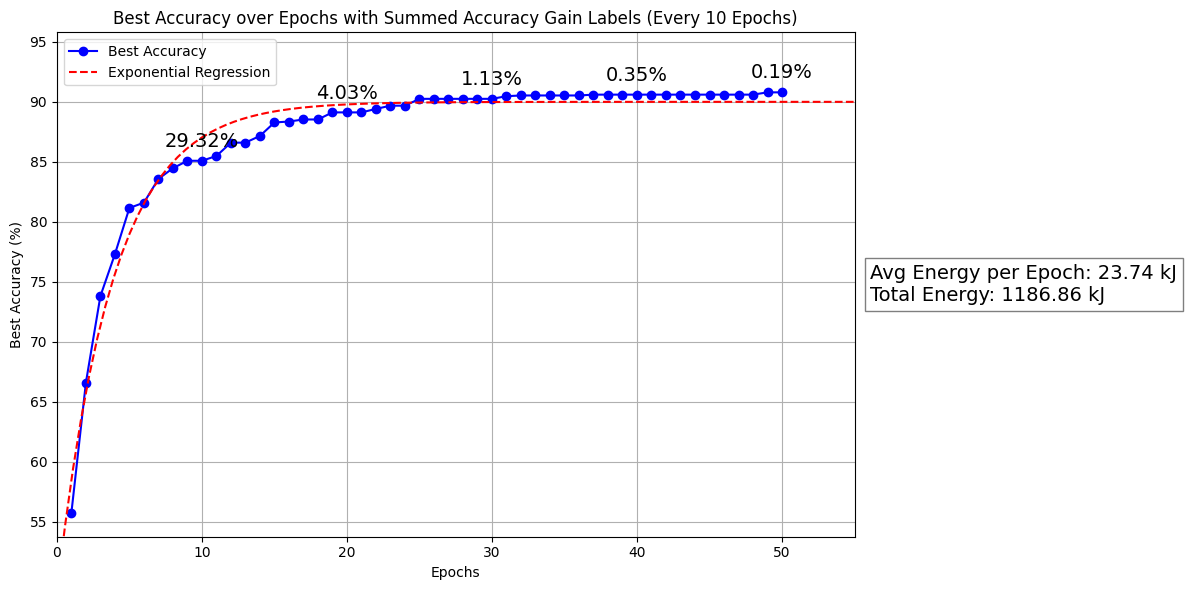

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def growth_exponential(x, L, k, y0):
    return L - (L - y0) * np.exp(-k * x)

file_path = "AdaptiveThresholdLTSNNData_WithAccuracyGained.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

avg_energy_kj = df['EpochEnergy_J'].mean() / 1000
total_energy_kj = df['EpochEnergy_J'].sum() / 1000

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['ep'], df['Best_Accuracy'], marker='o', linestyle='-', color='b', label='Best Accuracy')

x_data = df['ep']
y_data = df['Best_Accuracy']

initial_guesses = [df['Best_Accuracy'].max() + 10, 0.1, df['Best_Accuracy'].min() - 5]
popt, pcov = curve_fit(growth_exponential, x_data, y_data, p0=initial_guesses)

x_reg = np.linspace(0, df['ep'].max() + 5, 100)
y_reg = growth_exponential(x_reg, *popt)

ax.plot(x_reg, y_reg, linestyle='--', color='red', label='Exponential Regression')

summed_accuracy_gain = 0
for i, row in df.iterrows():
    summed_accuracy_gain += row['Accuracy_Gained']
    if (i + 1) % 10 == 0 or (i + 1) == len(df):
        ax.annotate(f"{summed_accuracy_gain:.2f}%", (row['ep'], row['Best_Accuracy']),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)
        summed_accuracy_gain = 0

ax.set_xlabel("Epochs")
ax.set_ylabel("Best Accuracy (%)")
ax.set_title("Best Accuracy over Epochs with Summed Accuracy Gain Labels (Every 10 Epochs)")

plt.text(1.02, 0.5, f"Avg Energy per Epoch: {avg_energy_kj:.2f} kJ\nTotal Energy: {total_energy_kj:.2f} kJ",
         transform=ax.transAxes, fontsize=14, verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0.5))

ax.set_ylim(df['Best_Accuracy'].min() - 2, df['Best_Accuracy'].max() + 5)

ax.set_xlim(0, df['ep'].max() + 5)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()